<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-LinearRegression" data-toc-modified-id="Модель-LinearRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель LinearRegression</a></span><ul class="toc-item"><li><span><a href="#На-выборках-c-MEstimateEncoder" data-toc-modified-id="На-выборках-c-MEstimateEncoder-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>На выборках c MEstimateEncoder</a></span></li></ul></li><li><span><a href="#Модель-CatBoostRegressor" data-toc-modified-id="Модель-CatBoostRegressor-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель CatBoostRegressor</a></span><ul class="toc-item"><li><span><a href="#На-выборках-без-кодировки" data-toc-modified-id="На-выборках-без-кодировки-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>На выборках без кодировки</a></span></li></ul></li><li><span><a href="#Модель-LightGBMRegressor" data-toc-modified-id="Модель-LightGBMRegressor-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель LightGBMRegressor</a></span></li><li><span><a href="#RandomForestRegressor-(случайный-лес)" data-toc-modified-id="RandomForestRegressor-(случайный-лес)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>RandomForestRegressor (случайный лес)</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></div>

# Проект: Определение стоимости автомобилей

Описание исследования:

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. Данное приожение позвонит быстро узнать рыночную стоимость своего автомобиля. 

Цель исследования: 
    
Провести анализ данных при помощи которых сервис разработает приложение для оценки рыночной стоймости автомобиля

Задачи исследования:

- 1) подготовить и обработать данные для обучения моделей
- 2) выбрать и обучить несколько моделей.
- 3) проанализировать результат и выбрать лучшую модель для дальнейшего использования в приложении

Исходные данные:
данные находятся в файле /datasets/autos.csv. 
Данные состоят из признаков
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

Целевой признак
- Price — цена (евро)

## Подготовка данных

In [1]:
#импортируем необходимые библиотеки и инструменты
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm
import lightgbm as lgbm

import time 

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor 
from lightgbm import LGBMRegressor


from sklearn.metrics import mean_squared_error

In [2]:
#загрузим данные
data = pd.read_csv('/datasets/autos.csv')

In [3]:
#посмотрим таблицу первые 5 значений
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
#посмотрим общую информацию о "data"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

посчитаем количество строк до подготовки данных

In [5]:
num_d = data.shape[0]
print(num_d)

354369


данные состоят из 16 столбцов и 354369 строк. К сожалению в данных есть пропуски (VehicleType, Gearbox, Model, FuelType, Repaired) и так же есть признаки которые могут не пригодиться, или даже помешать. рассмотрим более подробнее

для начала стоит избавиться от ненужных признаков:
- DateCrawled — дата скачивания анкеты из базы
- RegistrationMonth — месяц регистрации автомобиля, если год еще имеет значение, то месяц особо не влияет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля, может повлиять на шанс покупки, но не на стоймость.
- PostalCode — почтовый индекс владельца анкеты (пользователя)- не связаны с автомобилем
- LastSeen — дата последней активности пользователя - не связаны с автомобилем

In [6]:
# проверим дубликаты
data.duplicated().sum()

4

проверим последний год актуальности данных

In [7]:
data_crawled = max(data['DateCrawled'])
print(data_crawled)

2016-04-07 14:36:58


In [8]:
# удалим дубликаты
data = data.drop_duplicates()

In [9]:
# удалим ненужные столбцы
data = data.drop(['DateCrawled', 'RegistrationMonth', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], 
                 axis='columns')

In [10]:
# Проверим 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354365 non-null  int64 
 1   VehicleType       316875 non-null  object
 2   RegistrationYear  354365 non-null  int64 
 3   Gearbox           334532 non-null  object
 4   Power             354365 non-null  int64 
 5   Model             334660 non-null  object
 6   Kilometer         354365 non-null  int64 
 7   FuelType          321470 non-null  object
 8   Brand             354365 non-null  object
 9   Repaired          283211 non-null  object
dtypes: int64(4), object(6)
memory usage: 29.7+ MB


In [11]:
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


теперь осталось 10 признаков, и в 5 из них присутствуют пропуски 

In [12]:
data.describe()

,Price,RegistrationYear,Power,Kilometer
count,354365.000000,354365.000000,354365.000000,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989
std,4514.176349,90.228466,189.851330,37905.083858
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


из данной таблицы видно что есть значения которые выбиваются, например стоймость автомобиля минимальная равна 0, или дата регистрации автомобиля 1000 год а максимальный 9999, мощность равна 0, или наоборот запредельная.
нужно будет разобраться подробнее

Рассмотрим пропуски более подробно, постромим график для наглядности, отсортируем по убыванию

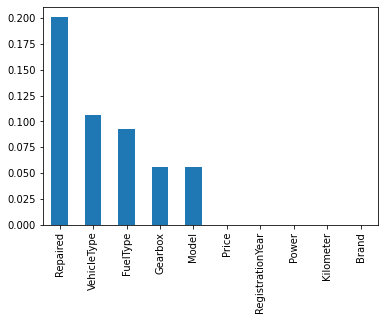

In [13]:
(data.isna().sum().sort_values(ascending=False) / data.shape[0]).plot(kind='bar');

Самое большое количество пропусков в столбце Repaired, составляют 20% от всех данных, VehicleType и FuelType около 10%,  Gearbox и Model около 5%, просто удалить нельзя, потеряется большой объем данных.

пропуски в столбце Repaired считаю можно заменить на yes (была в ремонте), так как продавец скорее всего хотел скрыть данную информацию, для привлечения покупателей, так как если бы не была, скорее всего продавец бы указала данный факт.

рассмотрим значения в остальных столбцах

In [14]:
data['VehicleType'].value_counts(dropna=False)

sedan          91457
small          79830
wagon          65165
NaN            37490
bus            28775
convertible    20203
coupe          16161
suv            11996
other           3288
Name: VehicleType, dtype: int64

In [15]:
data['VehicleType'].value_counts(dropna=False)

sedan          91457
small          79830
wagon          65165
NaN            37490
bus            28775
convertible    20203
coupe          16161
suv            11996
other           3288
Name: VehicleType, dtype: int64

In [16]:
data['FuelType'].value_counts(dropna=False)

petrol      216349
gasoline     98719
NaN          32895
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

In [17]:
data['Gearbox'].value_counts(dropna=False)

manual    268249
auto       66283
NaN        19833
Name: Gearbox, dtype: int64

пропуски в столбце Gearbox считаю можно заменить на manual (ручная коробка), так как обычно считается что ручная коробка по умолчанию, автоматическая считается дороже, следовательно обычно указывают данный факт.

In [18]:
data['Gearbox'].value_counts(dropna=False)

manual    268249
auto       66283
NaN        19833
Name: Gearbox, dtype: int64

In [19]:
data['Model'].value_counts(dropna=False)

golf                  29232
other                 24420
3er                   19761
NaN                   19705
polo                  13066
                      ...  
serie_2                   8
serie_3                   4
rangerover                4
range_rover_evoque        2
serie_1                   2
Name: Model, Length: 251, dtype: int64

много разных моделей, рассмотрим уникальные значения

In [20]:
data['Model'].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19',
       'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox'

Так как много разных значений, предлагаю чтобы не удалять больше количество данных, заменить пропуски на значения unknown

In [21]:
data = data.fillna('unknown')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354365 non-null  int64 
 1   VehicleType       354365 non-null  object
 2   RegistrationYear  354365 non-null  int64 
 3   Gearbox           354365 non-null  object
 4   Power             354365 non-null  int64 
 5   Model             354365 non-null  object
 6   Kilometer         354365 non-null  int64 
 7   FuelType          354365 non-null  object
 8   Brand             354365 non-null  object
 9   Repaired          354365 non-null  object
dtypes: int64(4), object(6)
memory usage: 29.7+ MB


In [23]:
#убедимся что нет пропусков
data.isna().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
Repaired            0
dtype: int64

С пропусками разобрались. теперь попробуем разобраться с выбивающимися данными

рассмотрим графики по цене, году регистрации, мощности и пробегу

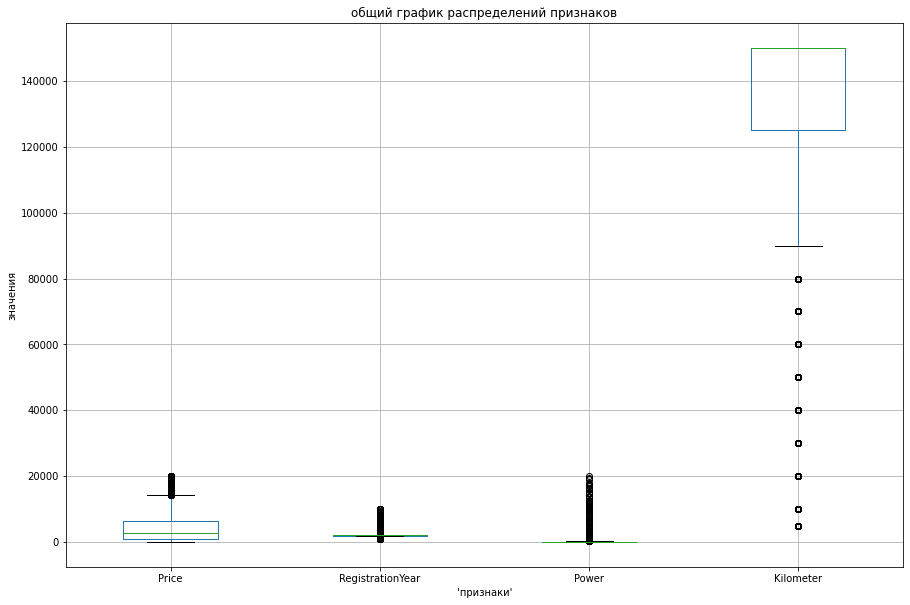

In [24]:
data.boxplot(figsize=(15, 10))
plt.xlabel("'признаки'")
plt.ylabel('значения')
plt.title('общий график распределений признаков')
plt.show();

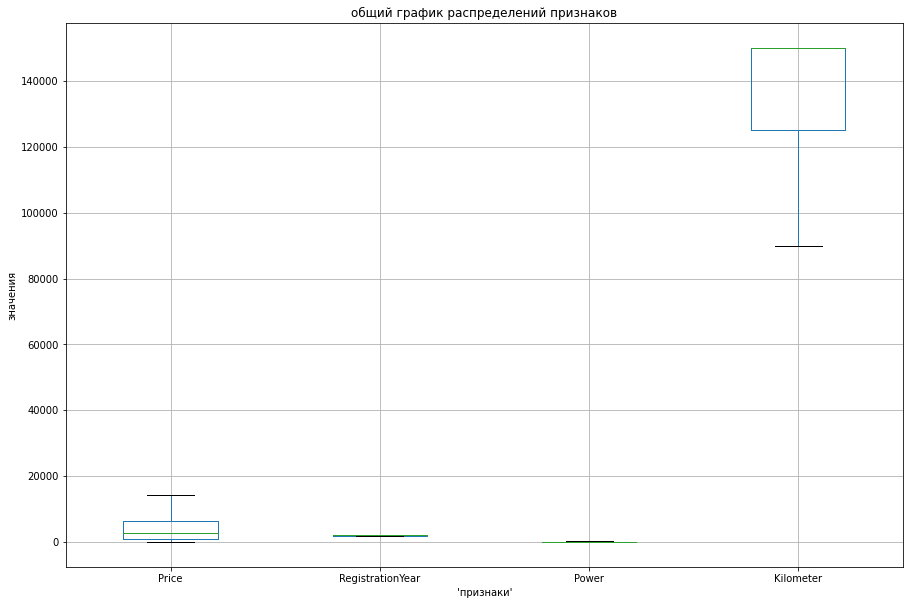

In [25]:
data.boxplot(showfliers=False, figsize=(15, 10))
plt.xlabel("'признаки'")
plt.ylabel('значения')
plt.title('общий график распределений признаков')
plt.show();

Рассмотрим по мощности

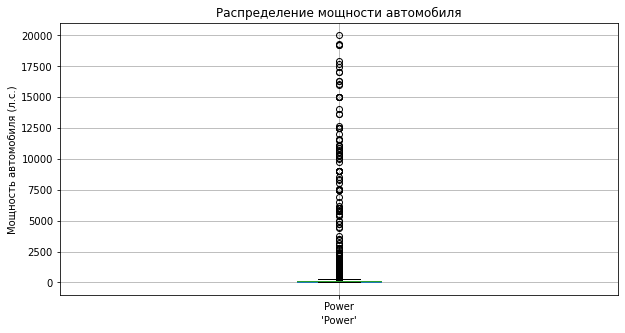

In [26]:
data.boxplot(column='Power', figsize=(10, 5))
plt.xlabel("'Power'")
plt.ylabel('Мощность автомобиля (л.с.)')
plt.title('Распределение мощности автомобиля')
plt.show()

Очень много выбросов, сильно искажают график. поискав информацию о мощностях автомобиля, узнал что максимальная мощность автомобиля на сегодняшний день составляет 2000 л.с что выше, информация не корректна.

In [27]:
#уберем значения выше 2000 л.с и меньше 10 л.с.
data = data.query('10 < = Power <= 2000')

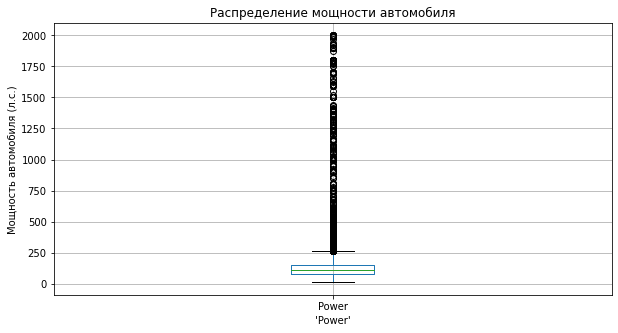

In [28]:
data.boxplot(column='Power', figsize=(10, 5))
plt.xlabel("'Power'")
plt.ylabel('Мощность автомобиля (л.с.)')
plt.title('Распределение мощности автомобиля')
plt.show()

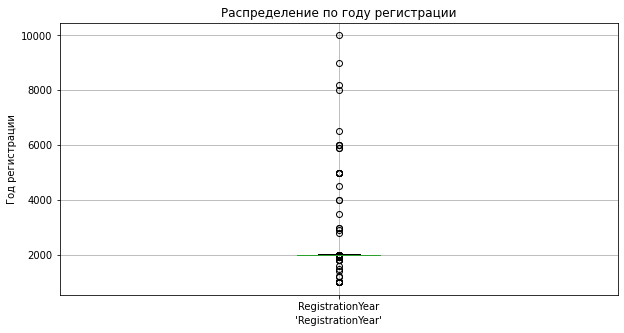

In [29]:
data.boxplot(column='RegistrationYear', figsize=(10, 5))
plt.xlabel("'RegistrationYear'")
plt.ylabel('Год регистрации')
plt.title('Распределение по году регистрации')
plt.show()

In [30]:
data.RegistrationYear.unique()

array([2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 2016, 2007,
       2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1991, 1984, 2006,
       1999, 2012, 1994, 2010, 2000, 1992, 2013, 1996, 1989, 2015, 1993,
       1985, 1982, 1983, 1973, 1969, 1971, 1987, 1988, 1970, 1986, 1976,
       1965, 1945, 1974, 1955, 1978, 1979, 1972, 1977, 1961, 1975, 1968,
       1963, 1966, 1964, 1954, 1958, 1959, 1956, 1941, 1960, 1500, 1962,
       1929, 1957, 1910, 1940, 1967, 1949, 1937, 1800, 1953, 2019, 1234,
       2900, 6000, 5911, 1400, 4000, 8000, 1200, 1932, 1951, 1952, 1950,
       5000, 1942, 1935, 3000, 6500, 1923, 1000, 1930, 9999, 1943, 1938,
       9000, 1936, 1928, 2800, 1931, 1948, 4500, 1927, 1933, 8200, 1947,
       1944, 3500, 1600])

разброс очень большой встречается 1000 год и 10000, то обратившись за дополнительной информаций было выяснено что самый первый автомобиль был зарегистрирован еще в 1886 году, так же считаю что автомобиле старше 1980 годов попадают в разряд раритетных, и данные о них сильно могут исжаться, то предлагаю удалить значения до 1980 и после 2016 годов

In [31]:
#уберем значения
data = data.query('1980 <= RegistrationYear <= 2016')

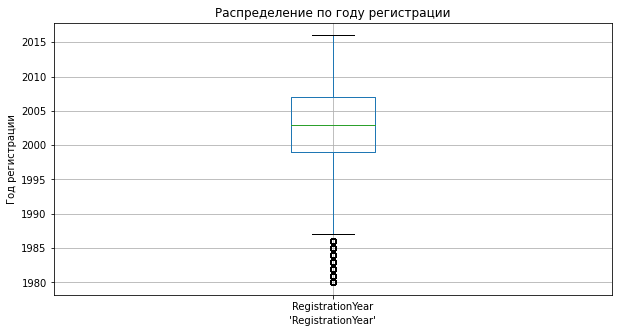

In [32]:
data.boxplot(column='RegistrationYear', figsize=(10, 5))
plt.xlabel("'RegistrationYear'")
plt.ylabel('Год регистрации')
plt.title('Распределение по году регистрации')
plt.show()

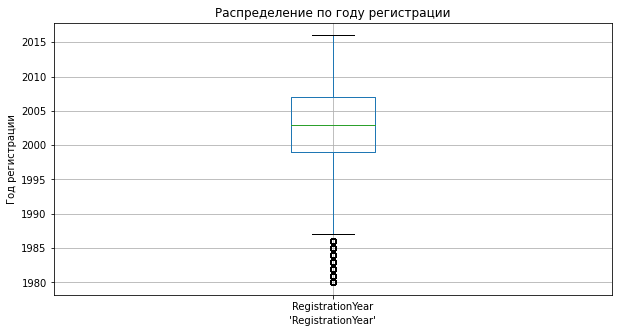

In [33]:
data.boxplot(column='RegistrationYear', figsize=(10, 5))
plt.xlabel("'RegistrationYear'")
plt.ylabel('Год регистрации')
plt.title('Распределение по году регистрации')
plt.show()

рассмотрим разброс цен

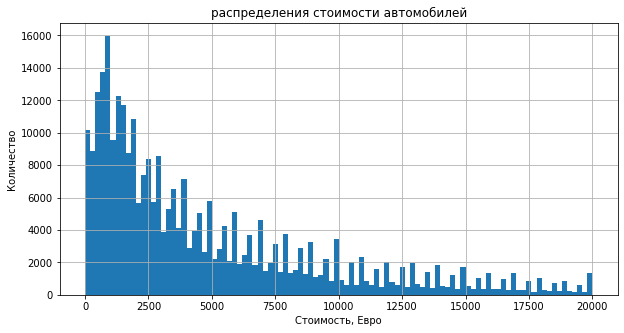

In [34]:
data.Price.hist(bins=100,figsize=(10,5))
plt.title('распределения стоимости автомобилей')
plt.xlabel('Стоимость, Евро')
plt.ylabel('Количество')
plt.show()

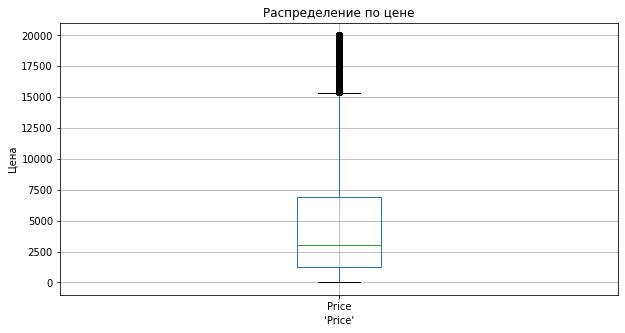

In [35]:
data.boxplot(column='Price', figsize=(10, 5))
plt.xlabel("'Price'")
plt.ylabel('Цена')
plt.title('Распределение по цене')
plt.show()

предлагаю максимальную стоймость автомобиля не трогать, а значения ниже 100 евро удалить, так как автомобиль может быть разбит, и продавец продает его на запчасти, а такие автомобили нам в обучении не нужны.

In [36]:
data = data.query('100 <= Price')

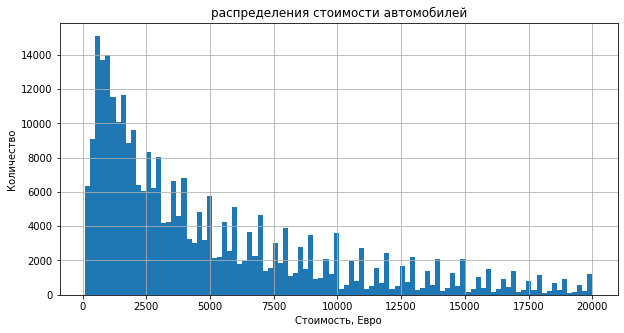

In [37]:
data.Price.hist(bins=100,figsize=(10,5))
plt.title('распределения стоимости автомобилей')
plt.xlabel('Стоимость, Евро')
plt.ylabel('Количество')
plt.show()

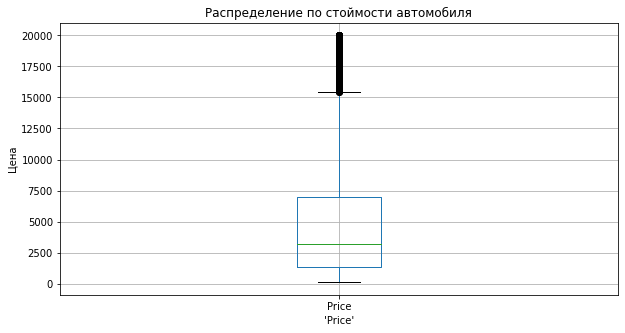

In [38]:
data.boxplot(column='Price', figsize=(10, 5))
plt.xlabel("'Price'")
plt.ylabel('Цена')
plt.title('Распределение по стоймости автомобиля')
plt.show()

проверим распределение по пробегу автомобиля

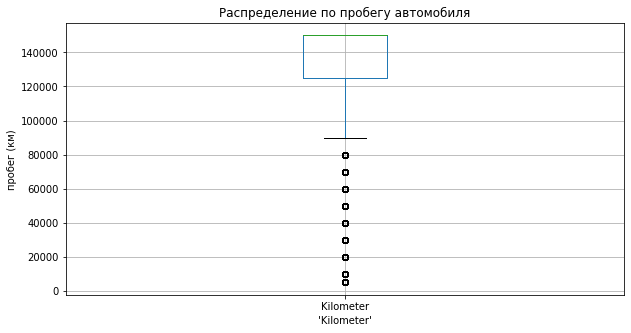

In [39]:
data.boxplot(column='Kilometer', figsize=(10, 5))
plt.xlabel("'Kilometer'")
plt.ylabel('пробег (км)')
plt.title('Распределение по пробегу автомобиля')
plt.show()

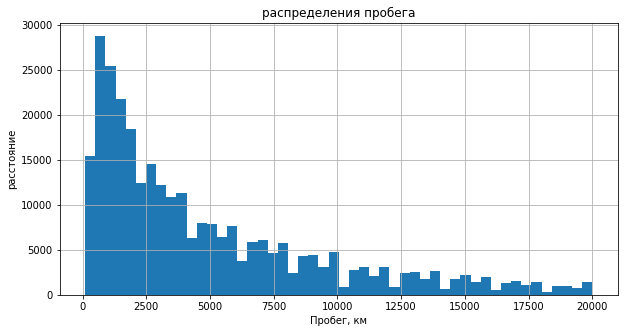

In [40]:
data.Price.hist(bins=50,figsize=(10,5))
plt.title('распределения пробега')
plt.xlabel('Пробег, км')
plt.ylabel('расстояние')
plt.show()

по пробегу считаю не стоит редактировать, так как значения во многом реалистиченые

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293219 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             293219 non-null  int64 
 1   VehicleType       293219 non-null  object
 2   RegistrationYear  293219 non-null  int64 
 3   Gearbox           293219 non-null  object
 4   Power             293219 non-null  int64 
 5   Model             293219 non-null  object
 6   Kilometer         293219 non-null  int64 
 7   FuelType          293219 non-null  object
 8   Brand             293219 non-null  object
 9   Repaired          293219 non-null  object
dtypes: int64(4), object(6)
memory usage: 24.6+ MB


In [42]:
# проверим дубликаты
data.duplicated().sum()

38915

In [43]:
#удалим дубликаты
data = data.drop_duplicates()

количество строк после подготовки данных

In [44]:
num_p = data.shape[0]
print('Количество строк данных после подготовки:', num_p)

Количество строк данных после подготовки: 254304


посчитаем сколько данных было потеряно

In [45]:
poteri = (1-num_p/num_d)
print('потери {:.2%}'.format(poteri))

потери 28.24%


In [46]:
data.describe()

,Price,RegistrationYear,Power,Kilometer
count,254304.000000,254304.000000,254304.000000,254304.000000
mean,4934.702152,2003.144571,122.759925,127556.605480
std,4646.898358,6.005806,64.327093,37128.108753
min,100.000000,1980.000000,10.000000,5000.000000
25%,1399.000000,1999.000000,80.000000,125000.000000
50%,3290.000000,2003.000000,115.000000,150000.000000
75%,7000.000000,2007.000000,150.000000,150000.000000
max,20000.000000,2016.000000,2000.000000,150000.000000


In [47]:
data.corr()

,Price,RegistrationYear,Power,Kilometer
Price,1.000000,0.557496,0.413694,-0.379384
RegistrationYear,0.557496,1.000000,0.093134,-0.355076
Power,0.413694,0.093134,1.000000,0.100579
Kilometer,-0.379384,-0.355076,0.100579,1.000000


Вывод:
В данной работе было изучены данные сервиса по продаже автомобилей с пробегом:
- в фаиле 16 столбцов и 354369 строк
- Уладил столбцы с ненужными признаками
- в фаиле присутствую пропуски и выбросы
- было обнаружено и удалено 4 дубликата
- были отредактированы выбросы в годах регистрации, мощностей автомобилей
- обработаны пропуски.
- Проверена корреляция

## Обучение моделей

- Подготовим выборки для обучения моделей.
- выделим признаки и целевой признак разделим на обучающую и тестовую выборку 75% на 25%.
- Подготовим три типа признаков для кроссвалидации:
- некодированные - features.
- Закодированные методом OHE. Название features_ohe.
- Закодированные методом OE. Название features_oe.

In [48]:
#выделим признаки и целевой признак:
features = data.drop('Price', axis=1)
target = data.Price

In [49]:
#разделим на обучающую и тестовую выборку 75 на 25:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, 
                                                                            test_size=.25,
                                                                            random_state=12345)

In [50]:
#закодируем признаки с помощью OHE:
features_ohe = pd.get_dummies(features, drop_first=True)

features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe = train_test_split(features_ohe,
                                                                                            target,
                                                                                            test_size=.25,
                                                                                            random_state=12345)

In [51]:
#encoder = OrdinalEncoder()
#features_train_oe = features[['VehicleType','FuelType','Brand','Model', 'Gearbox', 'Repaired']]
#features_train_oe = pd.DataFrame(encoder.fit_transform(features_train),
                                 #columns=features_train.columns,
                                 #index=features_train.index)

#features_train_oe = features_oe.loc[features_train.index, :]
#features_test_oe = features_oe.loc[features_test.index, :]
#features_test_oe = features_test[['VehicleType','FuelType','Brand','Model', 'Gearbox', 'Repaired']]

#target_train_oe = target_train.copy()
#target_test_oe = target_test.copy()

In [52]:
#копирем данные
features_train_oe = features_train.copy()
features_test_oe = features_test.copy()
# выделяем категории
category_features_oe = ['VehicleType','FuelType','Brand','Model', 'Gearbox', 'Repaired']

encoder = OrdinalEncoder()
#учим кодировщик на выборке features_train_oe
encoder.fit(features_train_oe[category_features_oe])
#перекодируем выборки features_train_oe и features_test_oe
features_train_oe[category_features_oe] = encoder.transform(features_train_oe[category_features_oe])
features_test_oe[category_features_oe] = encoder.transform(features_test_oe[category_features_oe])

target_train_oe = target_train.copy()
target_test_oe = target_test.copy()

features_test_oe.head()

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
178593,0.0,2008,0.0,170,220.0,150000,2.0,38.0,0.0
88746,5.0,2009,1.0,69,13.0,80000,6.0,9.0,0.0
58726,1.0,2004,1.0,73,56.0,125000,6.0,5.0,0.0
19912,4.0,2006,1.0,102,163.0,70000,6.0,31.0,0.0
158023,5.0,2000,1.0,68,166.0,150000,6.0,31.0,0.0


In [53]:
!pip install category_encoders
import category_encoders as ce
encoder = ce.MEstimateEncoder()

     |████████████████████████████████| 81 kB 1.1 MB/s eta 0:00:011


In [54]:
features_train_mes = pd.DataFrame(encoder.fit_transform(features_train, target_train))
features_test_mes = pd.DataFrame(encoder.transform(features_test, target_test))
target_train_mes = target_train.copy()
target_test_mes = target_test.copy()

In [55]:
print(features_train_mes.shape)
print(features_test_mes.shape)
print(target_train_mes.shape)
print(target_test_mes.shape)

(190728, 9)
(63576, 9)
(190728,)
(63576,)


Проверим размеры выборок

In [56]:
print(features_train_ohe.shape)
print(features_test_ohe.shape)
print(target_train_ohe.shape)
print(target_test_ohe.shape)

(190728, 309)
(63576, 309)
(190728,)
(63576,)


In [57]:
print(features_train_oe.shape)
print(features_test_oe.shape)
print(target_train_oe.shape)
print(target_test_oe.shape)

(190728, 9)
(63576, 9)
(190728,)
(63576,)


In [58]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(190728, 9)
(63576, 9)
(190728,)
(63576,)


Выберем следующие регрессоры для обучения модели:
- LinearRegression
- CatBoostRegressor
- LGBMRegressor
- RandomForestRegressor

Для изучения всех моделей в качестве метрики воспользуемся MSE и в финальной таблице переведем в RMSE. 

### Модель LinearRegression

#### На выборках c MEstimateEncoder

In [59]:
%%time
start = time.time()
model_lr = LinearRegression()
model_lr.fit(features_train_mes, target_train_mes)
cvs_rmse_lr =((cross_val_score(model_lr,
                               features_train_mes,
                               target_train_mes,
                               cv=5,
                               scoring='neg_mean_squared_error').mean()* -1)** .5).round()
print('RMSE линейной регрессии MEstimateEncoder:',cvs_rmse_lr)
end = time.time()
time_lr=round(end-start,1)
print('Время:', time_lr)

RMSE линейной регрессии MEstimateEncoder: 2741.0
Время: 1.0
CPU times: user 542 ms, sys: 498 ms, total: 1.04 s
Wall time: 1 s


In [60]:
target_predict = model_lr.predict(features_test_mes)

rmse_lr_mes = (mean_squared_error(target_test_mes, target_predict) ** 0.5).round()
print('RMSE линейной регрессии MEstimateEncoder:',rmse_lr_mes)

RMSE линейной регрессии MEstimateEncoder: 2753.0


Лучший RMSE = 2741 получился моделью LinearRegression  больше 2500, уже не подходит, время обучения 1 сек.

### Модель CatBoostRegressor

#### На выборках без кодировки

In [61]:
%%time
start = time.time()
model_cbr = CatBoostRegressor(learning_rate=0.5, 
                              iterations=200, 
                              random_state=12345, 
                              verbose=False, 
                              cat_features=['VehicleType','FuelType','Brand','Model', 'Gearbox', 'Repaired']) 

RMSE_CBR_cv = ((cross_val_score(model_cbr,
                                features_train, 
                                target_train, 
                                cv=5, 
                                scoring='neg_mean_squared_error').mean() * -1) ** 0.5).round()
print('RMSE модели CatBoostRegressor выборки без кодирования =:', RMSE_CBR_cv)
end = time.time()
time_cbr=round(end-start,1)
print('Время:', time_cbr)

RMSE модели CatBoostRegressor выборки без кодирования =: 1592.0
Время: 166.4
CPU times: user 2min 39s, sys: 968 ms, total: 2min 40s
Wall time: 2min 46s


Лучший RMSE = 1592 получился моделью CatBoostRegressor меньше 2500, уже подходит, время обучения 2.мин 44.сек

### Модель LightGBMRegressor

In [62]:
%%time
start = time.time()
model_lgbmr = LGBMRegressor() 
parameters = [{'num_leaves':[50, 100, 200], 'learning_rate':[0.1, 0.3, 0.5], 'random_state':[12345]}]


clf = GridSearchCV(model_lgbmr, parameters, scoring='neg_mean_squared_error')
clf.fit(features_train_mes, target_train_mes)

print(clf.best_params_)
print()

means = clf.cv_results_['mean_test_score']

rsme_lgbmr_mes = ((max(means) * -1) ** 0.5).round()
print('RMSE модели LGBMRegressor =:', rsme_lgbmr_mes)
end = time.time()
time_lgbmr=round(end-start,1)
print('Время:', time_lgbmr)

{'learning_rate': 0.1, 'num_leaves': 200, 'random_state': 12345}

RMSE модели LGBMRegressor =: 1540.0
Время: 448.0
CPU times: user 7min 20s, sys: 4.47 s, total: 7min 24s
Wall time: 7min 27s


In [63]:
%%time

model_lgbmr = LGBMRegressor(learning_rate=0.3, num_leaves=200, random_state=12345)
model_lgbmr.fit(features_train_mes, target_train_mes)
target_predict = model_lgbmr.predict(features_test_mes)
rsme_lgbmr =(mean_squared_error(target_test, target_predict) ** 0.5).round()
print('RMSE модели LGBMRegressor тестовой =:', rsme_lgbmr)
print('Время:')

RMSE модели LGBMRegressor тестовой =: 1539.0
Время:
CPU times: user 11.5 s, sys: 87.4 ms, total: 11.5 s
Wall time: 11.6 s


Лучший RMSE = 1509 получился моделью LightGBMRegressor меньше 2500, подходит. Время 6 минут 35 сек.

### RandomForestRegressor (случайный лес)

In [64]:
%%time
start = time.time()
model_rf = RandomForestRegressor(random_state=12345, criterion='mse',warm_start=False, n_estimators=100)
model_rf.fit(features_train_oe, target_train_oe)
rmse_rfr = ((cross_val_score(model_rf, features_train_oe, target_train_oe, 
                             scoring='neg_mean_squared_error', cv=3).mean() * -1) ** 0.5).round()
print('rmse_rfr модели:', rmse_rfr)
print(' Гиперпараметры модели:\n',model_rf)
end = time.time()
time_rfr=round(end-start,1)
print('Время:', time_rfr)

rmse_rfr модели: 1663.0
 Гиперпараметры модели:
 RandomForestRegressor(random_state=12345)
Время: 146.5
CPU times: user 2min 24s, sys: 1.94 s, total: 2min 26s
Wall time: 2min 26s


In [65]:
%%time
pred_rfr=model_rf.predict(features_test_oe)
rmse_rfr_oe = (mean_squared_error(target_test_oe,pred_rfr)** 0.5).round()
print('RMSE модели RandomForestRegressor выборки OE =:', rmse_rfr_oe)

RMSE модели RandomForestRegressor выборки OE =: 1636.0
CPU times: user 2.68 s, sys: 3.08 ms, total: 2.68 s
Wall time: 2.69 s


RMSE = 1663 получился моделью RandomForestRegressor меньше 2500, уже подходит.

## Анализ моделей

In [66]:
models = [['LinearRegression', time_lr, cvs_rmse_lr.round()], ['CatBoostRegressor', time_cbr, RMSE_CBR_cv.round()], 
          ['LGB', time_lgbmr, rsme_lgbmr_mes.round()], ['RandomForestRegressor', time_rfr, rmse_rfr.round()]]
          
data_models = pd.DataFrame(models, columns = ['модель', 'время, сек', 'RMSE']) 
          
data_models

,модель,"время, сек",RMSE
0,LinearRegression,1.0,2741.0
1,CatBoostRegressor,166.4,1592.0
2,LGB,448.0,1540.0
3,RandomForestRegressor,146.5,1663.0


## Вывод: 
лучшая модель получилась LGBMRegressor выборки = 1540, время обучения составил  391 сек.